## Importing the essentials

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('dataset/train.csv')
df_test =  pd.read_csv('dataset/test.csv')

In [4]:
print(df_train.shape)
print(df_test.shape)

(140700, 20)
(93800, 19)


In [5]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [6]:
df_train = df_train.drop(columns="id", axis=1)

In [7]:
df_train.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [8]:
# understanding the overview of the dataset
print(df_train.info())
print(df_train.duplicated())
print(df_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  

In [9]:
df_train.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [10]:
# replacing the space with a _
df_train.rename(columns=( lambda x : x.replace(' ', '_')), inplace=True)
df_test.rename(columns=( lambda x : x.replace(' ', '_')), inplace=True)

In [11]:
# uniques to find the anomalies in the dataset
for column in df_train.columns[1:]:
    print(f'{column} = {df_train[column].unique()}')
    print('-'*100)

Gender = ['Female' 'Male']
----------------------------------------------------------------------------------------------------
Age = [49. 26. 33. 22. 30. 59. 47. 38. 24. 42. 55. 51. 39. 29. 50. 23. 56. 45.
 37. 46. 31. 19. 28. 25. 41. 60. 18. 36. 21. 58. 44. 43. 40. 35. 54. 27.
 52. 48. 57. 53. 34. 20. 32.]
----------------------------------------------------------------------------------------------------
City = ['Ludhiana' 'Varanasi' 'Visakhapatnam' 'Mumbai' 'Kanpur' 'Ahmedabad'
 'Thane' 'Nashik' 'Bangalore' 'Patna' 'Rajkot' 'Jaipur' 'Pune' 'Lucknow'
 'Meerut' 'Agra' 'Surat' 'Faridabad' 'Hyderabad' 'Srinagar' 'Ghaziabad'
 'Kolkata' 'Chennai' 'Kalyan' 'Nagpur' 'Vadodara' 'Vasai-Virar' 'Delhi'
 'Bhopal' 'Indore' 'Ishanabad' 'Vidhi' 'Ayush' 'Gurgaon' 'Krishna'
 'Aishwarya' 'Keshav' 'Harsha' 'Nalini' 'Aditya' 'Malyansh' 'Raghavendra'
 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'Nandini' 'M.Com' 'Plata'
 'Atharv' 'Pratyush' 'City' '3.0' 'Less than 5 Kalyan' 'MCA' 'Mira'
 'Moreadhyay' 'Moren

In [12]:
degree = {
    "BHM": "BHM",
    "LLB": "LLB",
    "B.Pharm": "B.Pharm",
    "BPharm": "B.Pharm",
    "BBA": "BBA",
    "MCA": "MCA",
    "MD": "MD",
    "BSc": "B.Sc",
    "B.Sc": "B.Sc",
    "ME": "ME",
    "B.Arch": "B.Arch",
    "BArch": "B.Arch",
    "BCA": "BCA",
    "BE": "BE",
    "MA": "MA",
    "B.Ed": "B.Ed",
    "BEd": "B.Ed",
    "B.Com": "B.Com",
    "MBA": "MBA",
    "M.Com": "M.Com",
    "MHM": "MHM",
    "BA": "BA",
    "M.Tech": "M.Tech",
    "MTech": "M.Tech",
    "PhD": "PhD",
    "M.Ed": "M.Ed",
    "MEd": "M.Ed",
    "MSc": "M.Sc",
    "B.Tech": "B.Tech",
    "LLM": "LLM",
    "MBBS": "MBBS",
    "M.Pharm": "M.Pharm",
    "MPharm": "M.Pharm",
    "MPA": "MPA",
    "B BA": "B.BA",
    "B.B.Arch": "B.Arch",
    'Class 12' : 'Class 12',
    'Class 11' : 'Class 11'
}
df_train['Degree'] = df_train['Degree'].map(degree)
df_test['Degree'] =df_test['Degree'].map(degree)

In [13]:
# first five of the top values
for column in df_train.columns[5:13]:
    print(f'{column} = {df_train[column].value_counts().head(5)}')
    print('-'* 100)

Profession = Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Academic_Pressure = Academic_Pressure
3.0    7463
5.0    6296
4.0    5158
1.0    4801
2.0    4179
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Work_Pressure = Work_Pressure
2.0    24373
4.0    22512
5.0    22436
3.0    21899
1.0    21562
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
CGPA = CGPA
8.04    822
9.96    425
5.74    410
8.95    371
9.21    343
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Study_Satisfaction = Study_Satisfaction
4.0    6360
2.0    5840
3.0    5823
1.0    

In [14]:
# addressing the missing values here
df_train['Profession'].fillna(df_train['Profession'].mode()[0],inplace=True)
df_train['Academic_Pressure'].fillna(df_train['Academic_Pressure'].mean(),inplace=True)
df_train['Work_Pressure'].fillna(df_train['Work_Pressure'].mean(),inplace=True)
df_train['CGPA'].fillna(df_train['CGPA'].median(),inplace=True)
df_train['Job_Satisfaction'].fillna(df_train['Job_Satisfaction'].mean(),inplace=True)
df_train['Study_Satisfaction'].fillna(df_train['Study_Satisfaction'].mean(),inplace=True)
df_train['Dietary_Habits'].fillna(df_train['Dietary_Habits'].mode()[0],inplace=True)
df_train['Degree'].fillna(df_train['Degree'].mode()[0],inplace=True)
df_train['Financial_Stress'].fillna(df_train['Financial_Stress'].mean(),inplace=True)

# addressing the missing value in the test
df_test['Profession'].fillna(df_test['Profession'].mode()[0],inplace=True)
df_test['Academic_Pressure'].fillna(df_test['Academic_Pressure'].mean(),inplace=True)
df_test['Work_Pressure'].fillna(df_test['Work_Pressure'].mean(),inplace=True)
df_test['CGPA'].fillna(df_test['CGPA'].median(),inplace=True)
df_test['Job_Satisfaction'].fillna(df_test['Job_Satisfaction'].mean(),inplace=True)
df_test['Study_Satisfaction'].fillna(df_test['Study_Satisfaction'].mean(),inplace=True)
df_test['Dietary_Habits'].fillna(df_test['Dietary_Habits'].mode()[0],inplace=True)
df_test['Degree'].fillna(df_test['Degree'].mode()[0],inplace=True)

In [15]:
# now for the anomaies in the certain columns

# for train
# for numeric removing
df_train = df_train[~df_train['Dietary_Habits'].str.isnumeric()].reset_index(drop=True)
# for not needed data
valid_habits = df_train['Dietary_Habits'].value_counts().nlargest(3).index
df_train = df_train[df_train['Dietary_Habits'].isin(valid_habits)]

# for test
# for numeric removing
df_test = df_test[~df_test['Dietary_Habits'].str.isnumeric()].reset_index(drop=True)
# for not needed data
valid_habits = df_test['Dietary_Habits'].value_counts().nlargest(3).index
df_test = df_test[df_test['Dietary_Habits'].isin(valid_habits)]


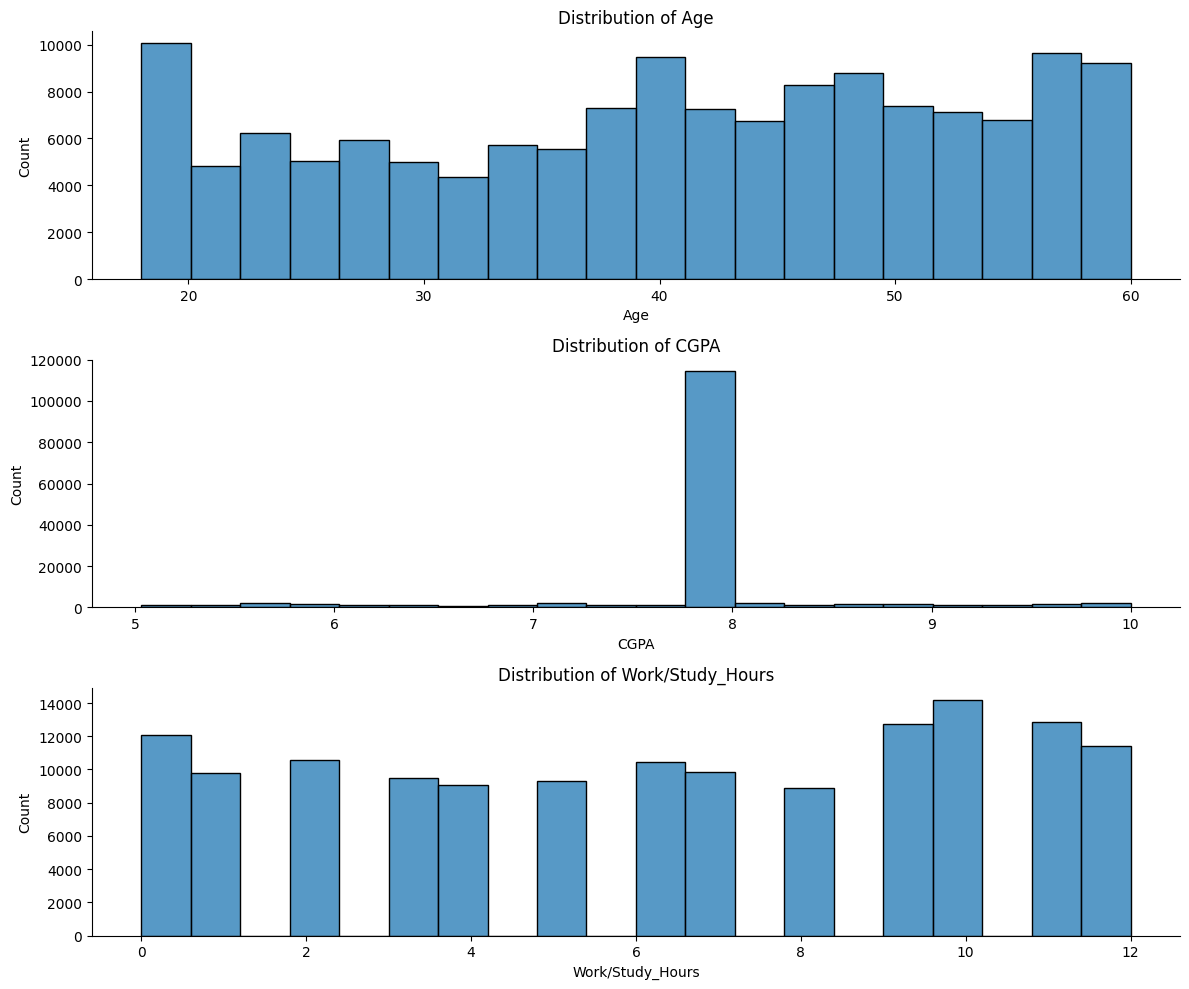

In [16]:
numerical_column = ['Age', 'CGPA', 'Work/Study_Hours']

plt.figure(figsize=(12,10))

for i, column in enumerate(numerical_column):
    plt.subplot(3,1,i+1)
    sns.histplot(data=df_train,x = column, kde=False, bins= 20)
    plt.title(f'Distribution of {column}')
    sns.despine()

plt.tight_layout()
plt.show()

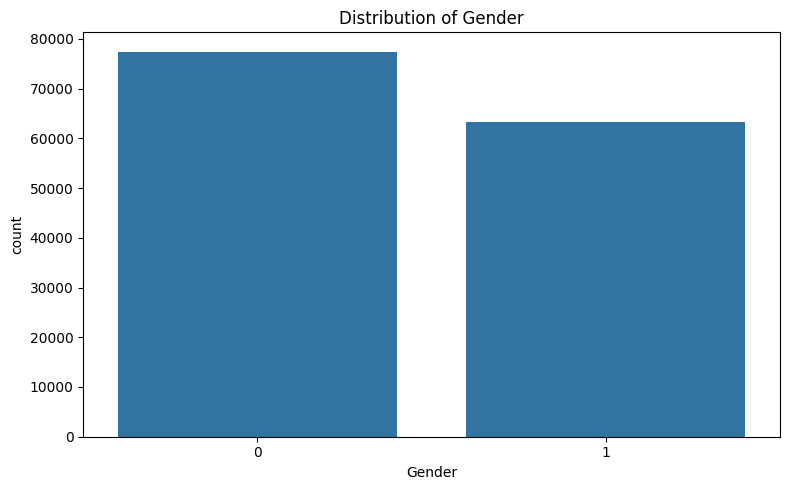

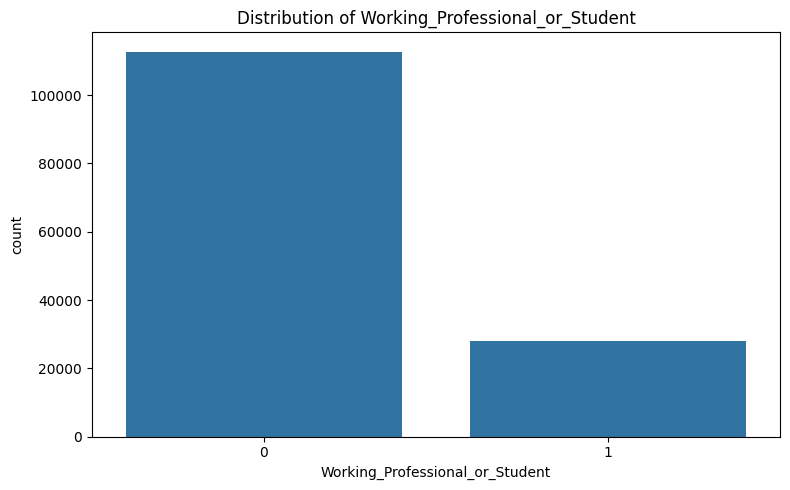

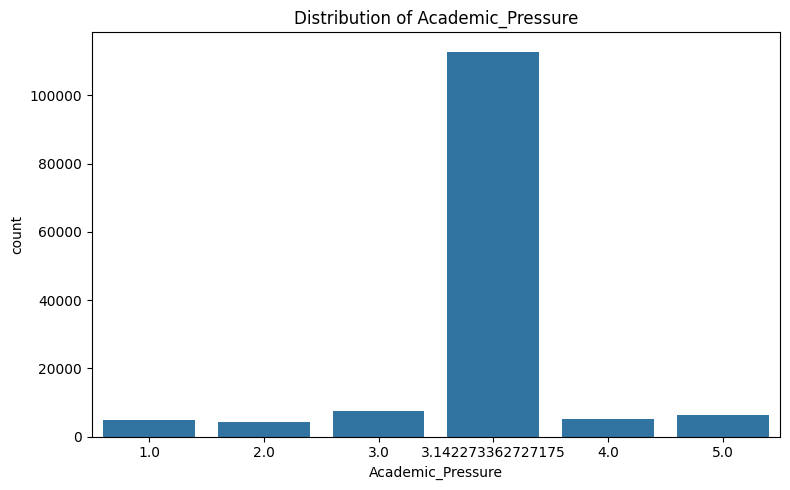

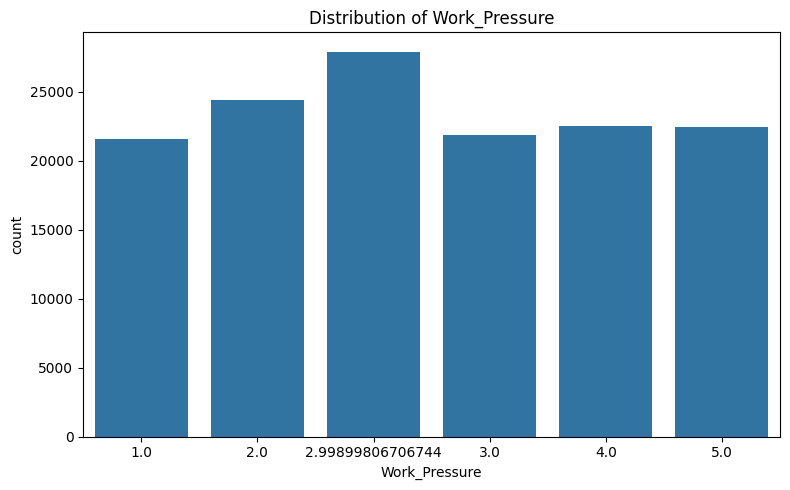

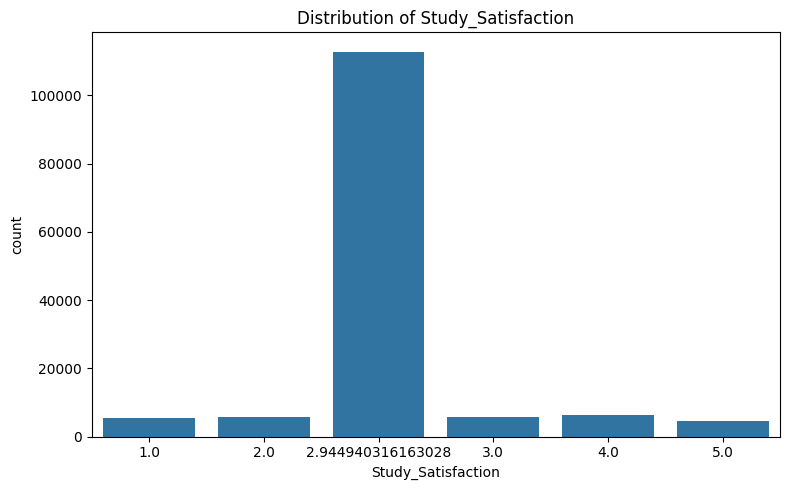

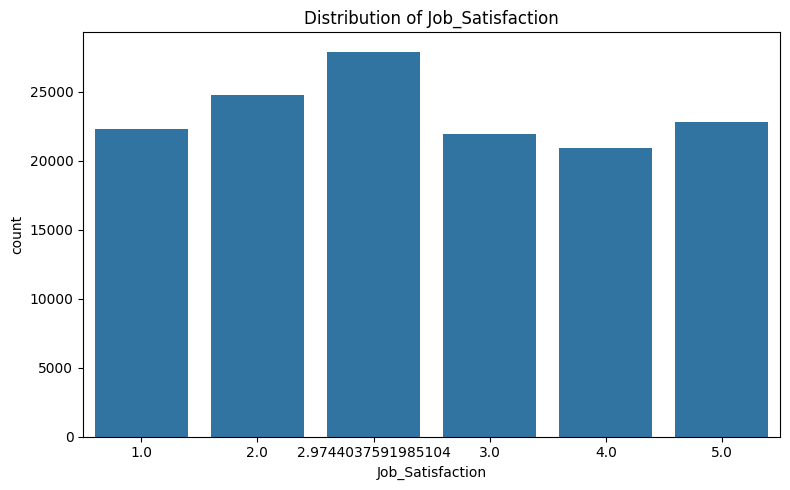

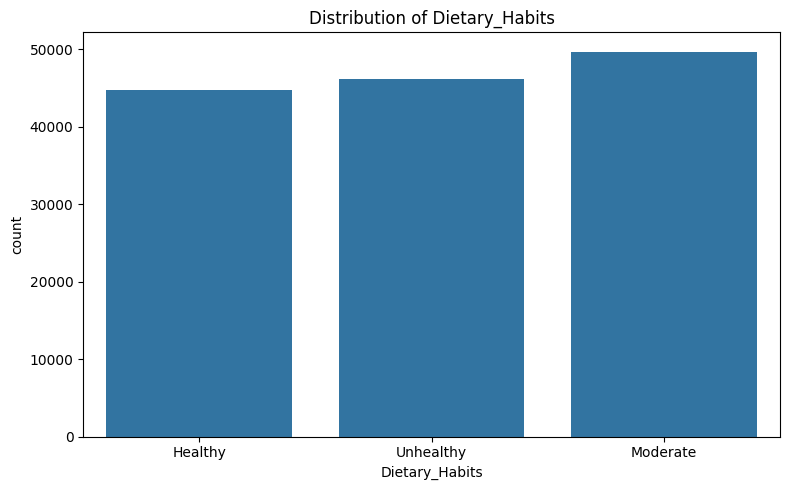

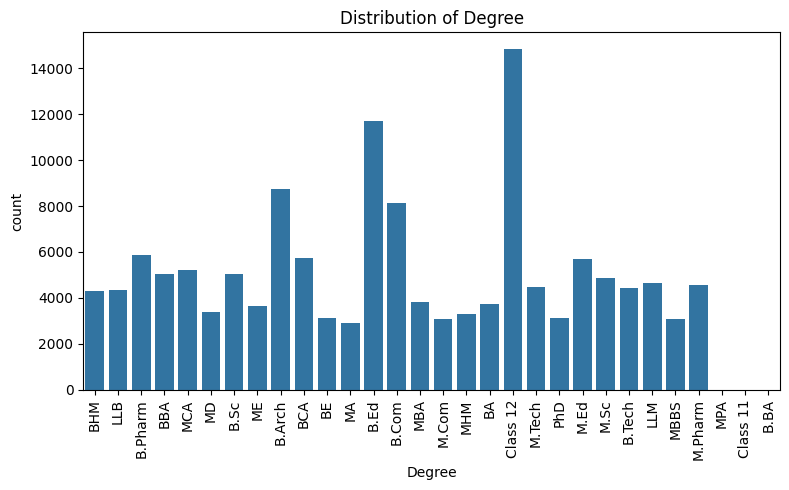

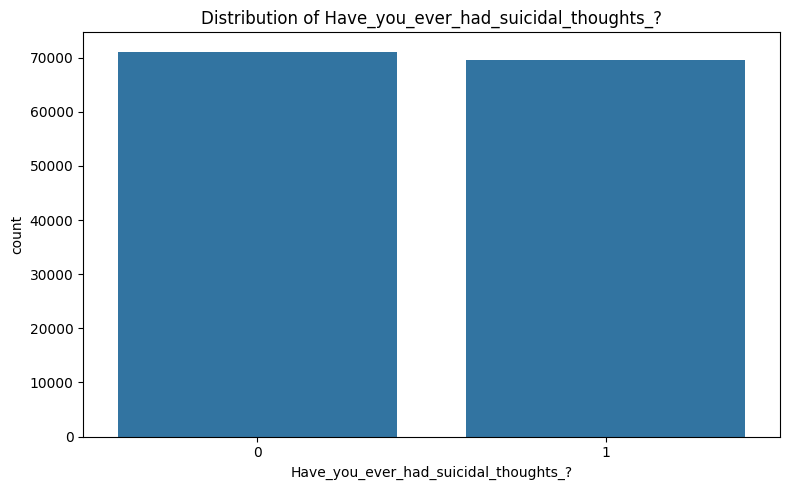

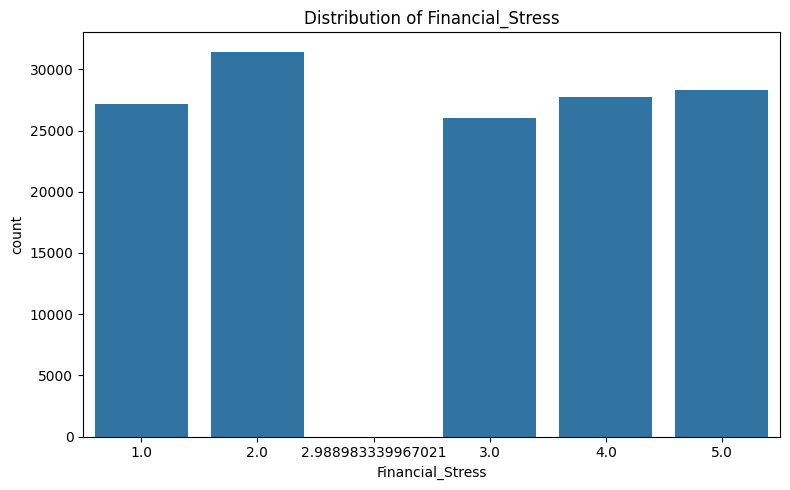

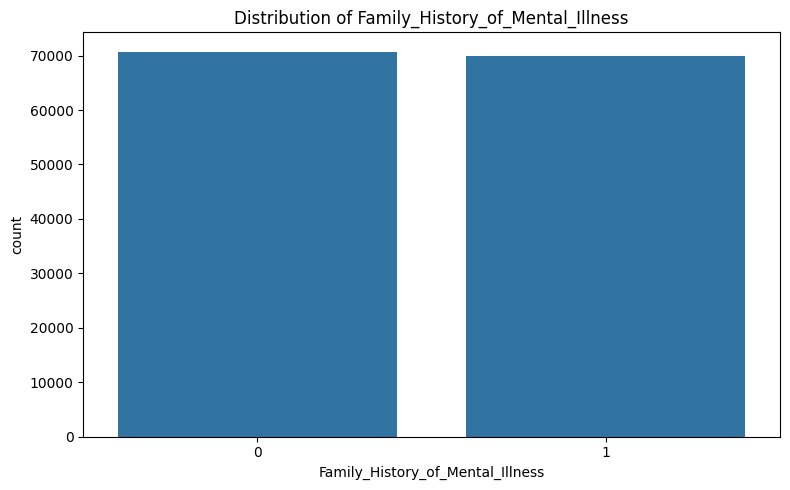

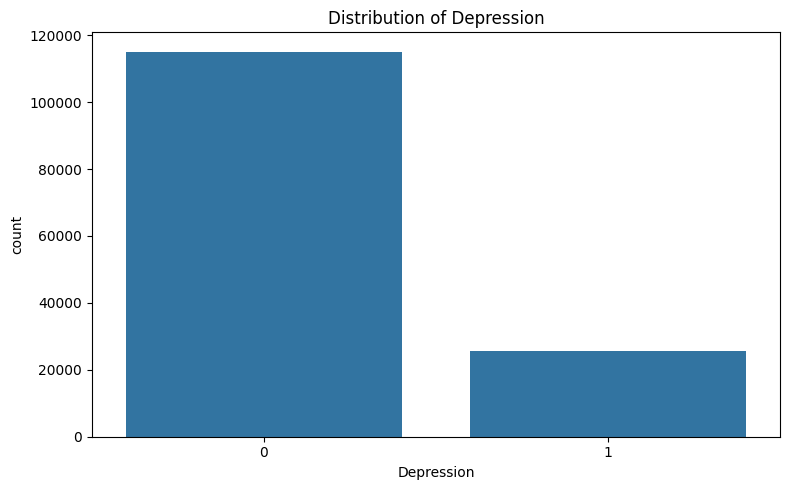

In [20]:
catagorical_column = ['Gender', 'Working_Professional_or_Student',
        'Academic_Pressure', 'Work_Pressure',
       'Study_Satisfaction', 'Job_Satisfaction',
       'Dietary_Habits', 'Degree', 'Have_you_ever_had_suicidal_thoughts_?',
       'Financial_Stress',
       'Family_History_of_Mental_Illness', 'Depression']

for column in catagorical_column:
    plt.figure(figsize=(8,5))
    if column == 'Degree':
        plt.xticks(rotation= 90)
    sns.countplot(data=df_train,x = column)  #hue = 'Depression', palette='viridis'
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

In [18]:
gender = {
    'Male':0,
    'Female' : 1
}
proornot = {
    'Working Professional' : 0,
    'Student' : 1
}
suicide = {
    'No': 0,
    'Yes' : 1
}
family_his = {
    'No': 0,
    'Yes' : 1
}

df_train['Gender'] = df_train['Gender'].map(gender)
df_test['Gender'] = df_test['Gender'].map(gender)

df_train['Working_Professional_or_Student'] = df_train['Working_Professional_or_Student'].map(proornot)
df_test['Working_Professional_or_Student'] = df_test['Working_Professional_or_Student'].map(proornot)

df_train['Have_you_ever_had_suicidal_thoughts_?'] = df_train['Have_you_ever_had_suicidal_thoughts_?'].map(suicide)
df_test['Have_you_ever_had_suicidal_thoughts_?'] = df_test['Have_you_ever_had_suicidal_thoughts_?'].map(suicide)

df_train['Family_History_of_Mental_Illness'] = df_train['Family_History_of_Mental_Illness'].map(family_his)
df_test['Family_History_of_Mental_Illness'] = df_test['Family_History_of_Mental_Illness'].map(family_his)